## Library import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import numpy as np
from matplotlib import font_manager, rc
from tqdm import tqdm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## Data load

In [4]:
path = 'C:/Users/user/Desktop/DACON/jeju_credit_card/'
data = pd.read_csv(path +'201901-202003.csv')
gc.collect()

7

### Get group data

In [ ]:
group_data = data.loc[:,['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM', 'AMT']].groupby(['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM']).sum()
group_data = np.log(group_data)

### Get error_group, uncomplete_group

In [9]:
days = group_data.reset_index()['REG_YYMM'].unique().astype('str') # REG_YYMM를 string으로 변환
citys = data.CARD_SIDO_NM.unique() # citys : 지역(시도)의 이름들을 list로 저장
std_list = []
error_group = [] # std가 0.3이상인 그룹 저장
uncomplete_group = [] # 모든 월별 데이터가 없는 그룹 저장


for city in tqdm(citys):
    clsses = data[data.CARD_SIDO_NM == city].STD_CLSS_NM.unique()
    # 특정지역에서는 업종이 없는 경우도 있음.
    # 지역별로 업종 list를 새로 생성
    for clss in clsses:
        y = group_data.loc[city, clss,:].values.reshape(-1)
        if len(y) == len(days):
            
            x = np.arange(12).reshape(-1,1)
            y_pred = np.zeros(12)
            y_pred[:] = y[:12].mean()
            std_list.append(y[:12].std())
            
            if 0.3 < y[:12].std():
                error_group.append((city, clss))
            else: 
                pass
        else:
            uncomplete_group.append((city, clss))
del group_data
gc.collect()

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:30<00:00,  1.77s/it]


0

In [6]:
error_group[:10] # std가 0.3을 넘는 그룹 중 10개만 보여주기

[('강원', '골프장 운영업'),
 ('강원', '관광 민예품 및 선물용품 소매업'),
 ('강원', '전시 및 행사 대행업'),
 ('강원', '호텔업'),
 ('강원', '휴양콘도 운영업'),
 ('강원', '여행사업'),
 ('강원', '자동차 임대업'),
 ('강원', '기타 수상오락 서비스업'),
 ('강원', '내항 여객 운송업'),
 ('경기', '골프장 운영업')]

In [7]:
uncomplete_group[:10] # 모든 월별 데이터가 없는 그룹 중 10개만 보여주기

[('강원', '면세점'),
 ('강원', '버스 운송업'),
 ('강원', '택시 운송업'),
 ('강원', '그외 기타 분류안된 오락관련 서비스업'),
 ('경기', '내항 여객 운송업'),
 ('경기', '그외 기타 분류안된 오락관련 서비스업'),
 ('경남', '자동차 임대업'),
 ('경북', '그외 기타 분류안된 오락관련 서비스업'),
 ('경북', '여행사업'),
 ('경북', '내항 여객 운송업')]

### Get [group_city_clss_time]

In [11]:
# 데이터를 날짜, 도시, 업종으로 groupby
# 인덱싱을 편하게 하기 위해 row를 CARD_SIDO_NM,	STD_CLSS_NM, REG_YYMM 3개의 level로 표현
group_city_clss_time = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .sum()
group_city_clss_time = pd.DataFrame(group_city_clss_time)
gc.collect()

# group_data는 'AMT'하나만 column으로 갖는다.
#group_city_clss_time = np.log(group_city_clss_time)
group_city_clss_time

AMT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM           
강원           건강보조식품 소매업  201901    148354746
                         201902    146715871
                         201903    109439025
                         201904    106548473
                         201905    148115738
...                                      ...
충북           휴양콘도 운영업    201911    124117555
                         201912    139568962
                         202001    222073112
                         202002     47085830
                         202003     12733490

[9438 rows x 1 columns]

### Get [group_city_clss_count]

In [12]:
group_city_clss_time_count = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .count()

group_city_clss_time_count = pd.DataFrame(group_city_clss_time_count)
group_city_clss_time_count.columns = ['COUNT']
gc.collect()
group_city_clss_time_count

COUNT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM       
강원           건강보조식품 소매업  201901       94
                         201902      104
                         201903       86
                         201904      104
                         201905      108
...                                  ...
충북           휴양콘도 운영업    201911      319
                         201912      349
                         202001      484
                         202002      127
                         202003       35

[9438 rows x 1 columns]

### Get [group_city_clss]

In [13]:
group_city_clss = pd.DataFrame(data.loc[:, ['CARD_SIDO_NM',
                          'STD_CLSS_NM',
                          'AMT']].groupby(['CARD_SIDO_NM',
                                          'STD_CLSS_NM'])['AMT'].sum())
#group_city_clss['AMT'] = np.log(group_city_clss['AMT'])
#group_city_clss = group_city_clss.reset_index() #index를 column에 포함시키기
group_city_clss

AMT
CARD_SIDO_NM STD_CLSS_NM                        
강원           건강보조식품 소매업               1820824382
             골프장 운영업                 51290887138
             과실 및 채소 소매업             16675489268
             관광 민예품 및 선물용품 소매업         457212008
             그외 기타 분류안된 오락관련 서비스업         177000
...                                          ...
충북           피자 햄버거 샌드위치 및 유사 음식점업   21294163365
             한식 음식점업                327145423793
             호텔업                       530914357
             화장품 및 방향제 소매업            9175488855
             휴양콘도 운영업                 2414736980

[650 rows x 1 columns]

### Make Plot Function

In [18]:
def plot_groups_by_month(group_list, log = False):
    plt.figure(figsize = (15,30))
    for index in range(len(group_list)):
        all_month = ['201901', '201902', '201903', '201904', '201905', '201906', '201907',
                 '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']
        new_y = {}
        city, clss = group_list[index]
        for month in all_month:
            if month in list(map(str, group_city_clss_time.loc[city, clss].index)):
                new_y[month] = int(group_city_clss_time.loc[city, clss, int(month)])
            else:
                new_y[month] = 0
                
        new_y = list(new_y.values())
        if log == True:
            new_y = np.log(new_y)
            
        plt.plot(all_month, new_y, 'o-', label = group_list[index])
        plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize = 15)
        #plt.title(group_list[index][0])
        plt.xticks(rotation = 45, fontsize = 15)
    plt.show()
    
def plot_city_clss_by_month(city, clss, color = 'red', count_ratio = 1):
    all_month = ['201901', '201902', '201903', '201904', '201905', '201906', '201907',
                 '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']
    new_amt = {}
    new_count = {}
    mean_amt = group_city_clss_time.loc[city, clss].mean()
    print('<AMT인 년월>')
    zero_month = []
    for month in all_month:
        if month in list(map(str, group_city_clss_time.loc[city, clss].index)):
            new_amt[month] = int(group_city_clss_time.loc[city, clss, int(month)])
            new_count[month] = int(group_city_clss_time_count.loc[city, clss, int(month)]) * mean_amt/10 * count_ratio
        else:
            new_amt[month] = 0
            new_count[month] = 0
            zero_month.append(month)
    print(zero_month)
    plt.plot(all_month, list(new_amt.values()), 'o-', color = color, label = 'AMT')
    plt.plot(all_month, list(new_count.values()), 'o-', label  = 'COUNT')
    plt.legend()
    plt.title(city + ' ' + clss)
    plt.xticks(rotation = 45)
    plt.show()

### Plot all error_grup in orginal scale

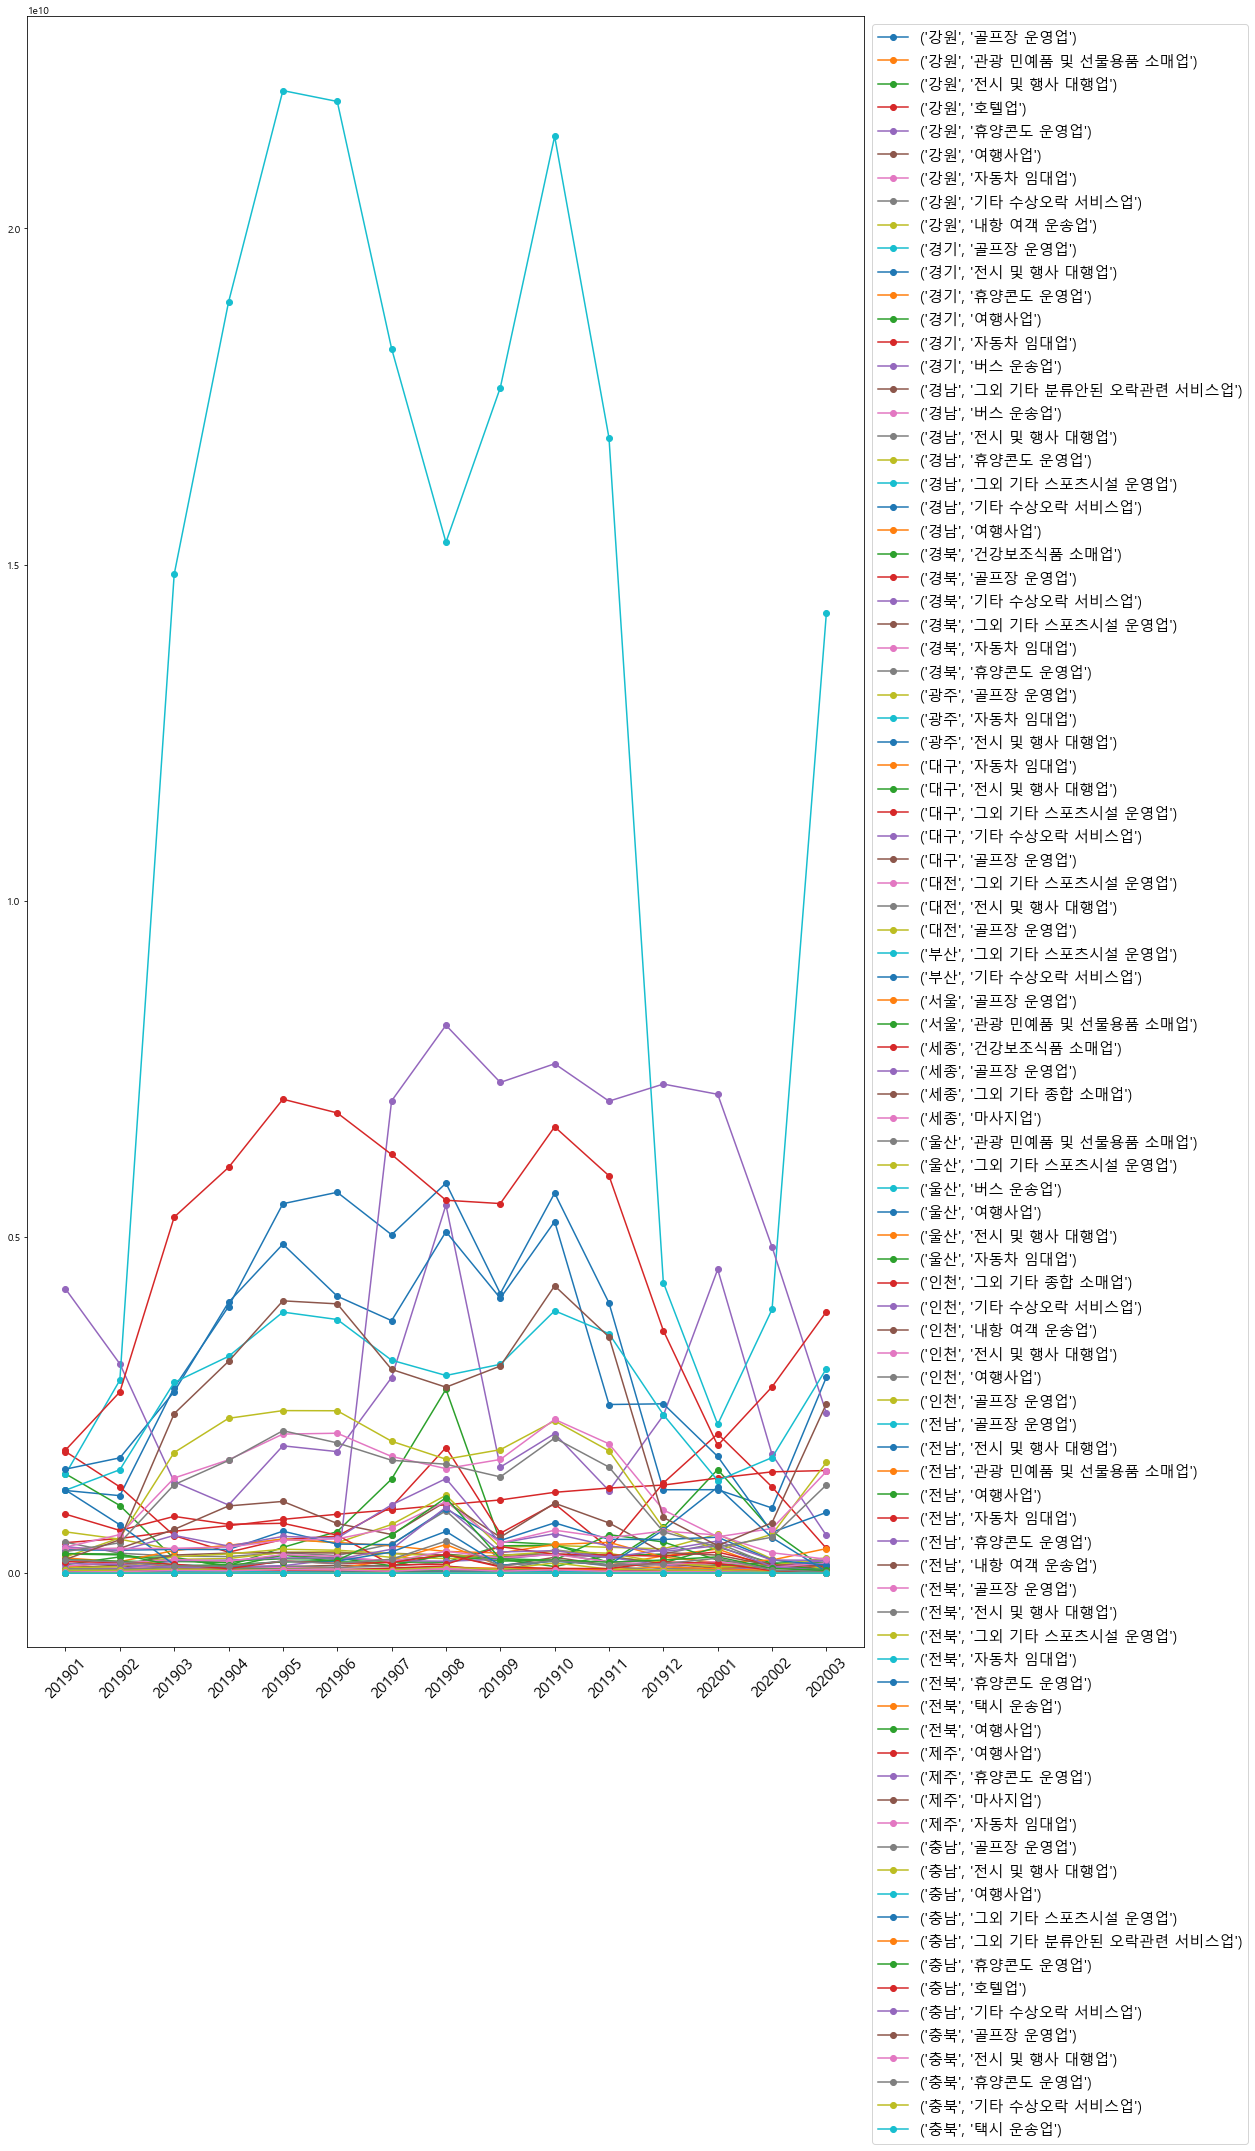

In [17]:
plot_groups_by_month(error_group)

### Plot all error_group in log sclae

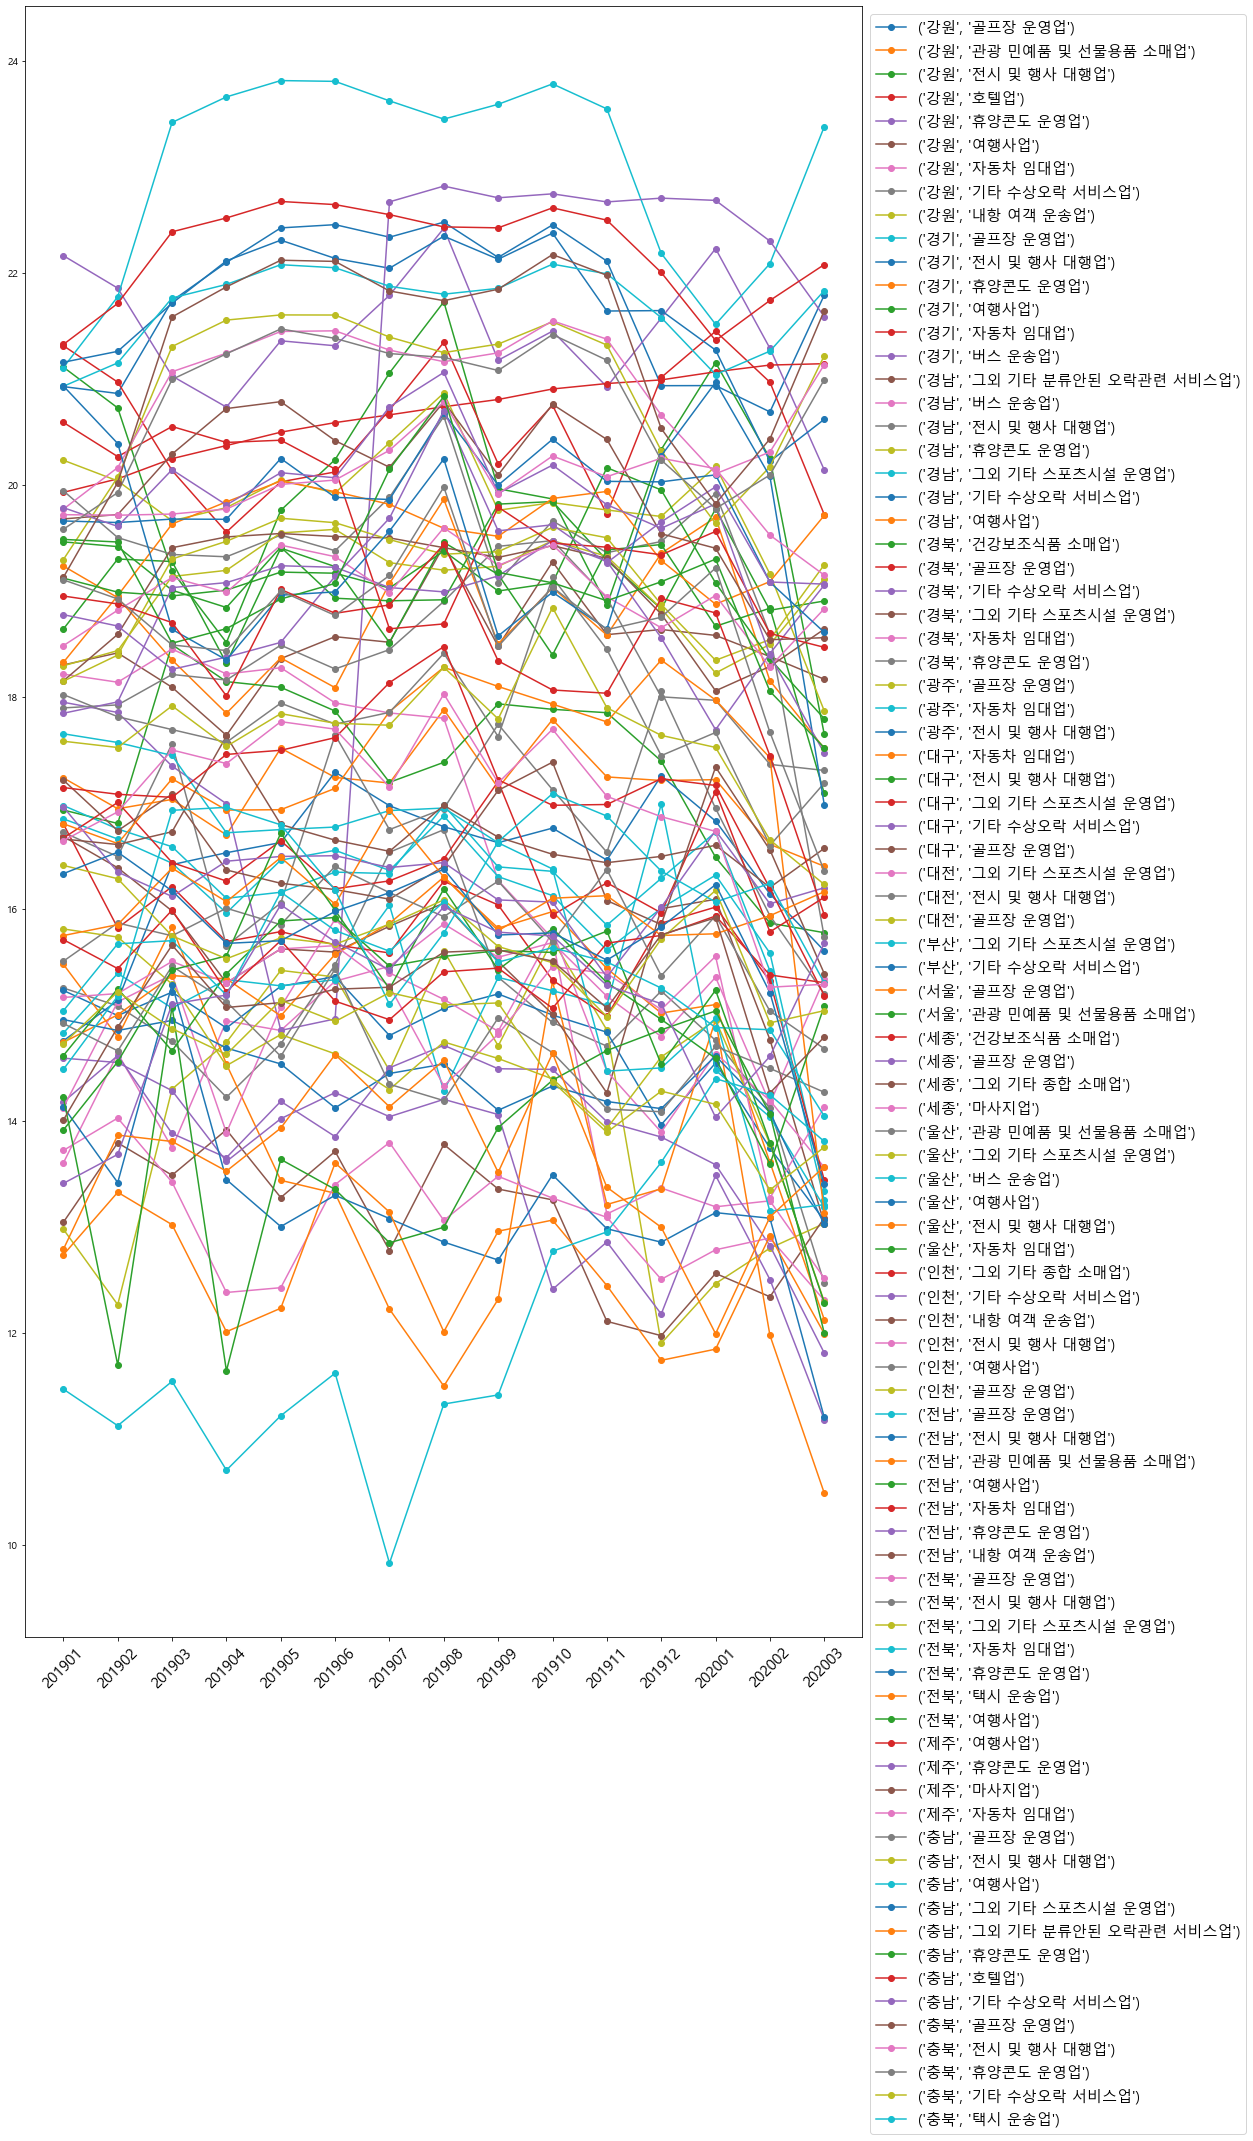

In [19]:
plot_groups_by_month(error_group, log = True)

<AMT인 년월>
[]


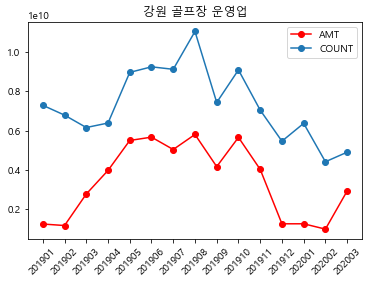

'\n4월 :\n7월 : \n'

In [16]:
i = 0
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


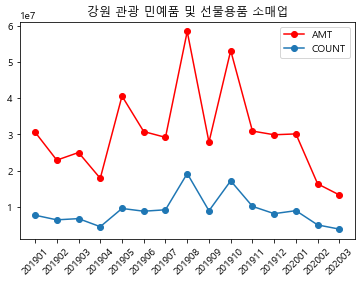

'\n4월 :\n7월 : \n'

In [21]:
i = 1
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


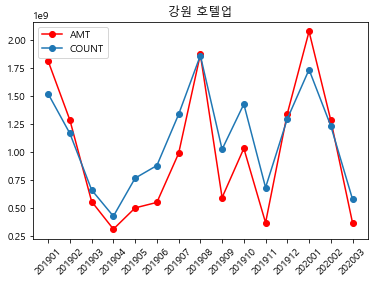

'\n4월 :\n7월 : \n'

In [23]:
i = 3
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


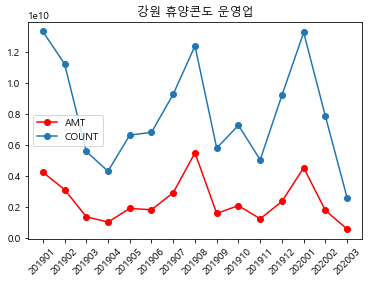

'\n4월 :\n7월 : \n'

In [24]:
i = 4
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


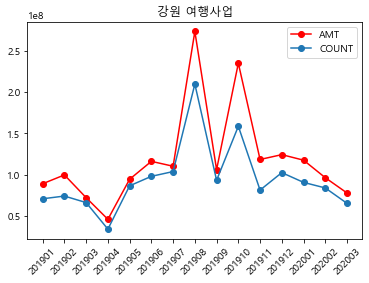

'\n4월 :\n7월 : \n'

In [25]:
i = 5
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


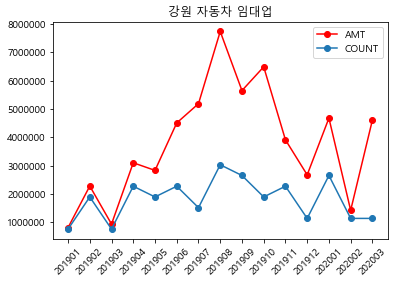

'\n4월 :\n7월 : \n'

In [30]:
i = 6
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 1)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


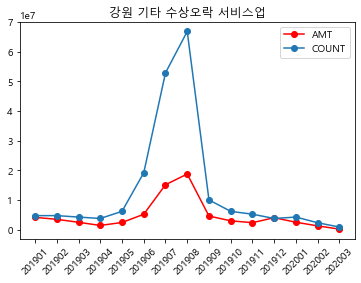

'\n4월 :\n7월 : \n'

In [31]:
i = 7
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 1)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


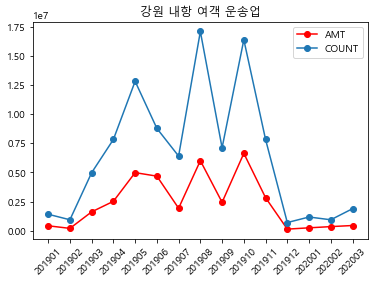

'\n4월 :\n7월 : \n'

In [32]:
i = 8
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 1)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


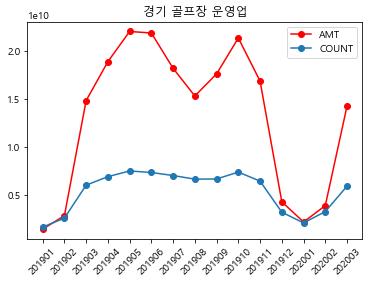

'\n4월 :\n7월 : \n'

In [36]:
i = 9
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.001)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


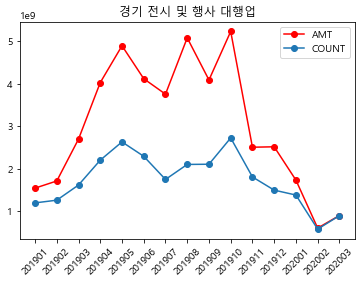

'\n4월 :\n7월 : \n'

In [37]:
i = 10
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.001)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


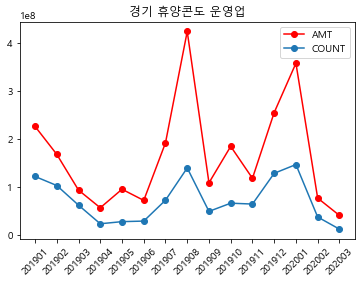

'\n4월 :\n7월 : \n'

In [39]:
i = 11
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


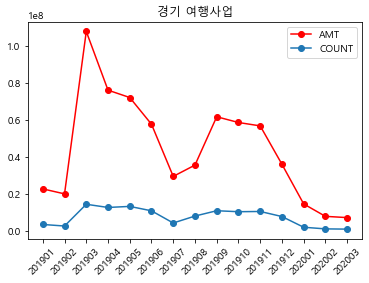

'\n4월 :\n7월 : \n'

In [44]:
i = 12
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


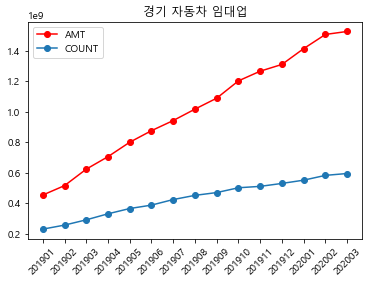

'\n4월 :\n7월 : \n'

In [45]:
i = 13
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


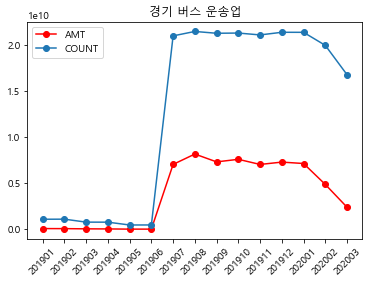

'\n4월 :\n7월 : \n'

In [46]:
i = 14
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''